In [79]:

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loop over the list of csv files
products  = ["DAX","ECH","EEM","EPOL","EPU","EWJ","EWM","EWT","EWZ","MCHI","SPY","THD"]
merge_lst = []

path      = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
  

for product in products:
    
    for f in csv_files:
        if product+"_pnl" in f:
            pnl_df = pd.read_csv(f)      
            pnl_df['product_name'] = [product]*len(pnl_df)     

            close_df = pd.read_csv(product+'.csv')

            result = pd.merge(close_df[['Date','Close','Dividends','Stock Splits']], 
                            pnl_df[['asofdate', 'pnl']],
                            left_on='Date',
                            right_on='asofdate',
                            how='inner')

            merge_lst.append(result)

merge_df = pd.concat(merge_lst,axis=0)

portfolio_value = 100000
position_size   = 0.083

scale = []

merge_df = merge_df.reset_index()

i = 0
while i < len(merge_df):

    scale.append(np.floor(portfolio_value*position_size/merge_df['Close'][i]))

    i+=1

merge_df['scale']        = scale
merge_df['rescaled_pnl'] = merge_df['scale']*merge_df['pnl']

merge_df['cumulative_pnl'] = merge_df.groupby(by='Date')['rescaled_pnl'].sum()

In [72]:
cache_test.to_csv('test.csv')

In [74]:
final_pnl_df = pd.read_csv(r'test.csv',parse_dates=True,index_col='Date')

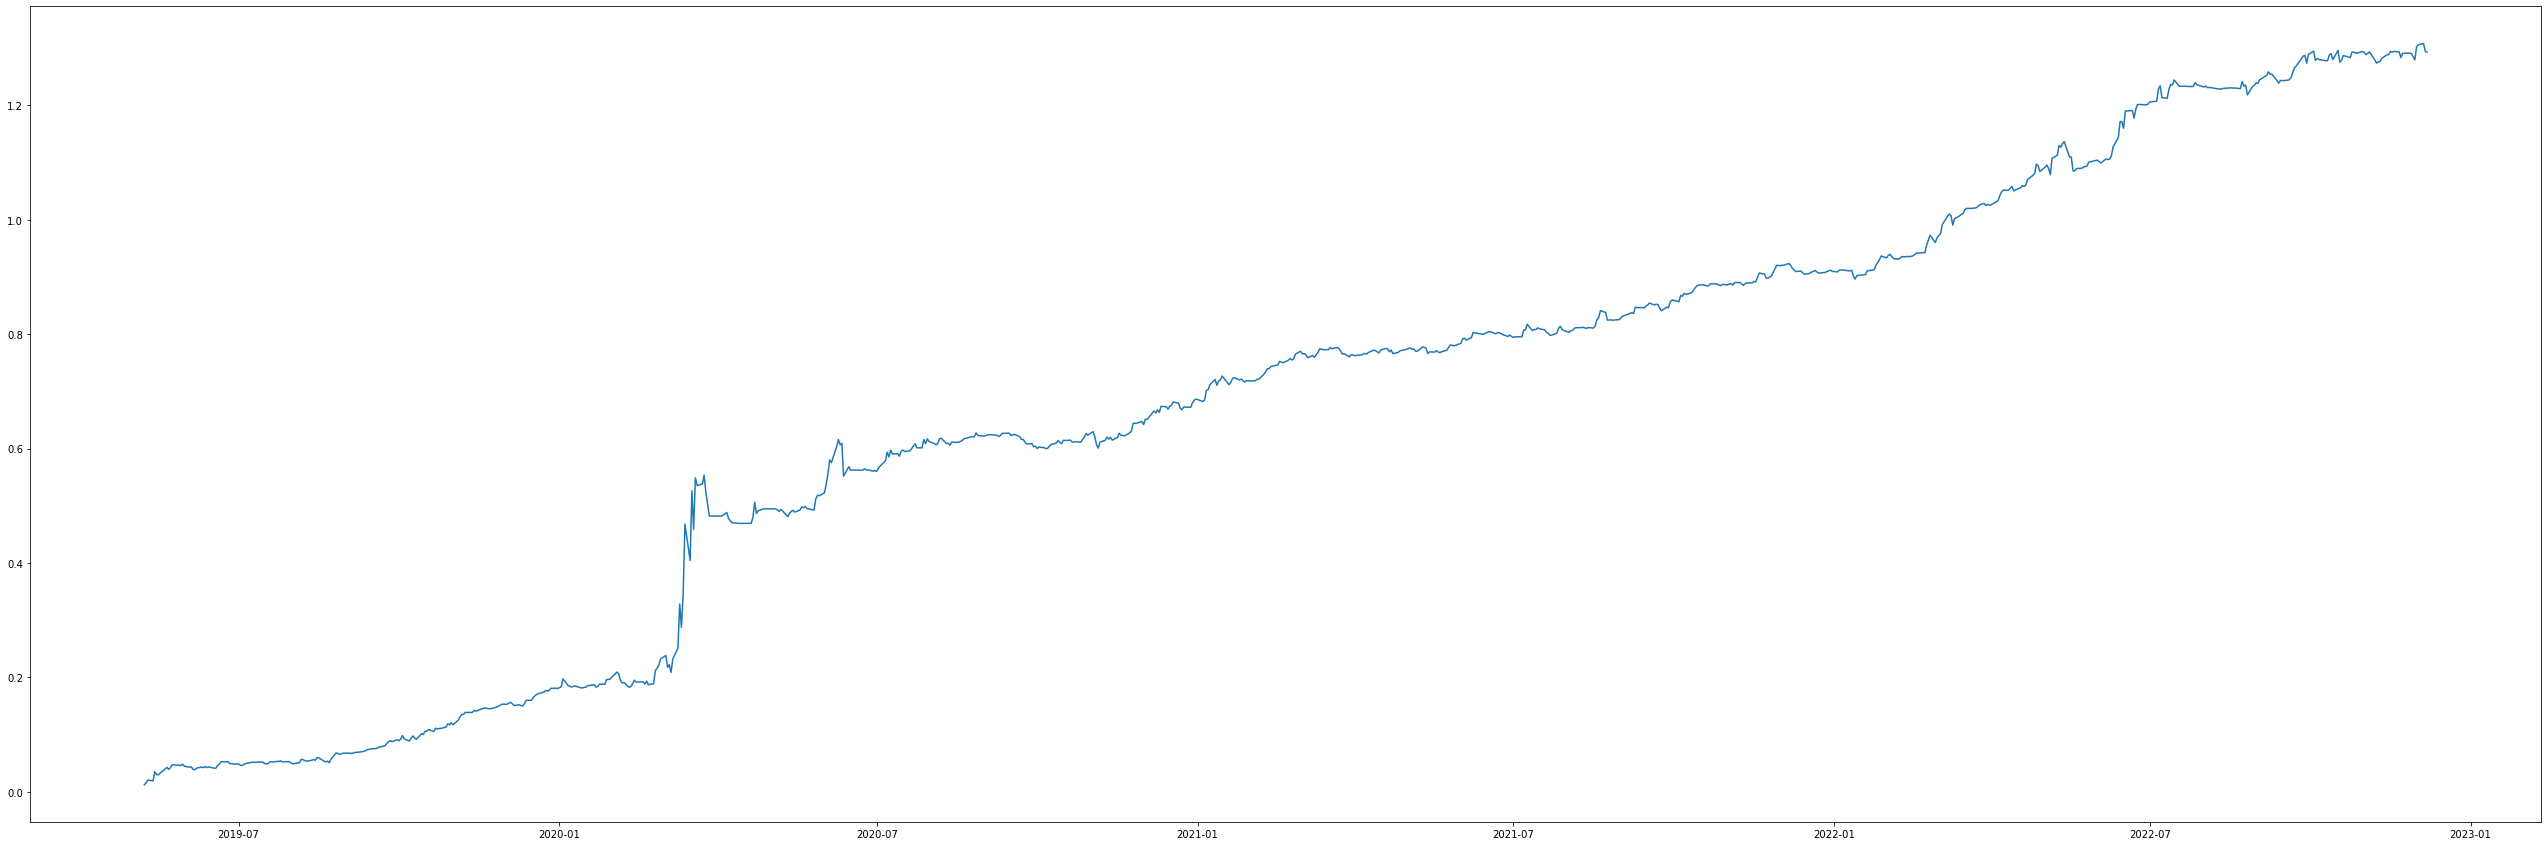

In [77]:
plt.figure(figsize=(45,15))
plt.plot(final_pnl_df['rescaled_pnl'].cumsum()/100000)
plt.show()

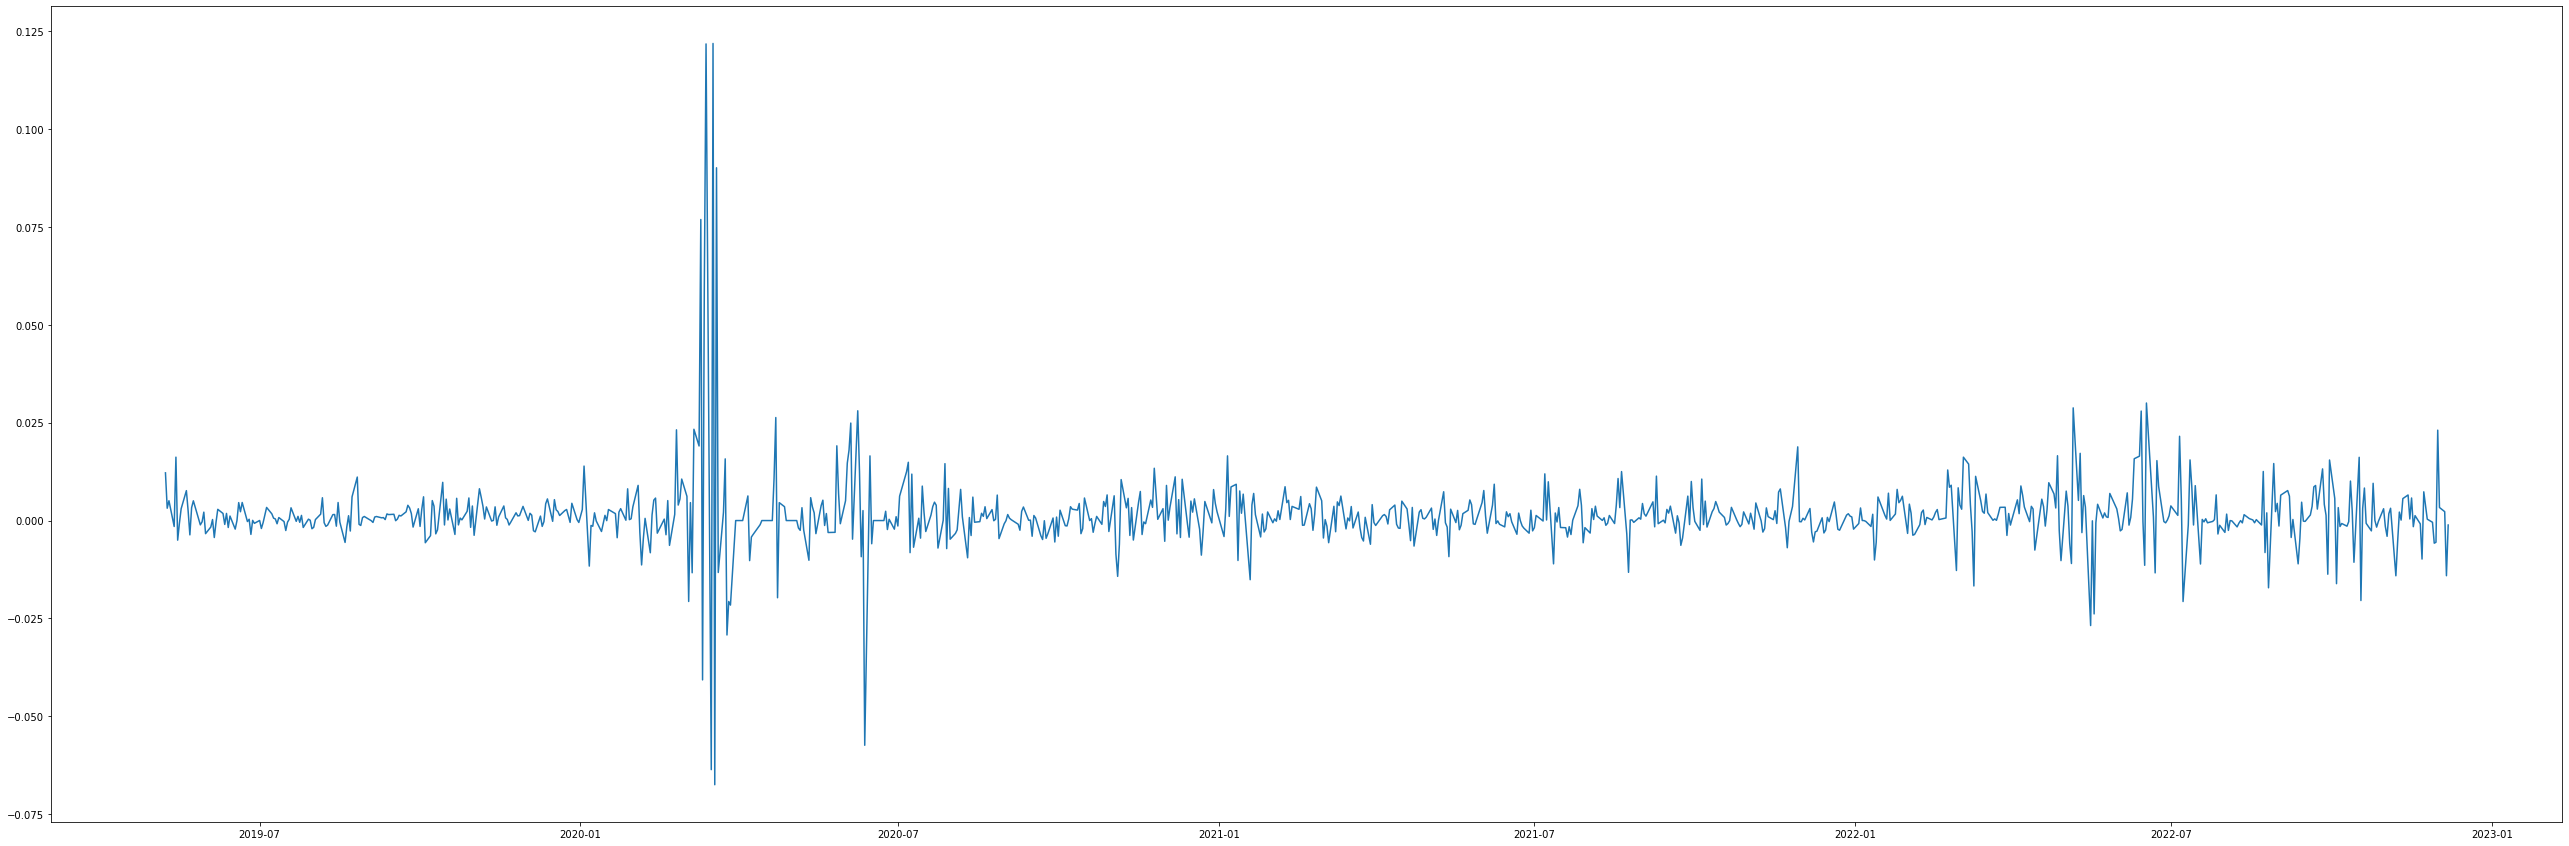

In [78]:
plt.figure(figsize=(45,15))
plt.plot(final_pnl_df['rescaled_pnl']/100000)
plt.show()

In [37]:
merge_df.to_csv(r'merge_pnl.csv')